Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/luka/anaconda3/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

In [4]:
# %load mlutils.py
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50);


Accuracy: 7 out of 7
Accuracy %: 1.0



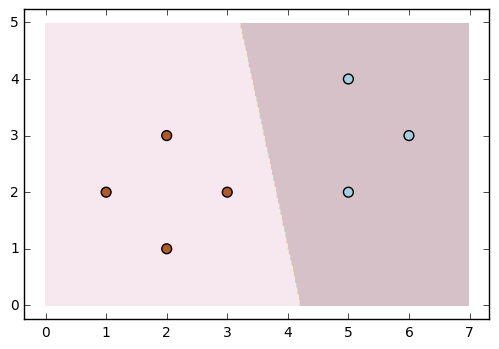

In [5]:
# Vaš kôd ovdje...
def modelRidgeClassifier(X, y):
    
    model = RidgeClassifier(alpha=0)
    model.fit(X, y)

    h = model.predict(X)
    #print h
    E = mean_squared_error(y, h)

    acc1 = accuracy_score(y, h, normalize = False)
    acc2 = accuracy_score(y, h)
    print "Accuracy: {} out of {}\nAccuracy %: {}\n".format(acc1, y.shape[0], acc2)

    plt.scatter(X[:,0], X[:, 1])
    plot_2d_clf_problem(X, y, model.predict)

modelRidgeClassifier(seven_X, seven_y)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

Accuracy: 7 out of 7
Accuracy %: 1.0



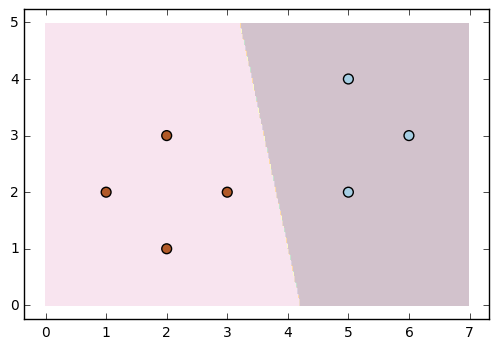

In [6]:
# Vaš kôd ovdje...

def modelLinearRegression(X, y):

    y = y.reshape((y.shape[0], 1))
    model = LinearRegression()
    model.fit(X, y)

    h = model.predict(X)
    #print h.transpose()
    E = mean_squared_error(y, h)

    for i in range(h.shape[0]):
        if h[i] > 0:
            h[i] = 1
        else:
            h[i] = -1

    #print h.transpose()
    
    acc1 = accuracy_score(y, h, normalize = False)
    acc2 = accuracy_score(y, h)
    print "Accuracy: {} out of {}\nAccuracy %: {}\n".format(acc1, y.shape[0], acc2)

    plt.scatter(X[:,0], X[:, 1])
    plot_2d_clf_problem(X, y, h=lambda x: model.predict(x) >= 0)
    
modelLinearRegression(seven_X, seven_y)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

Accuracy: 7 out of 8
Accuracy %: 0.875



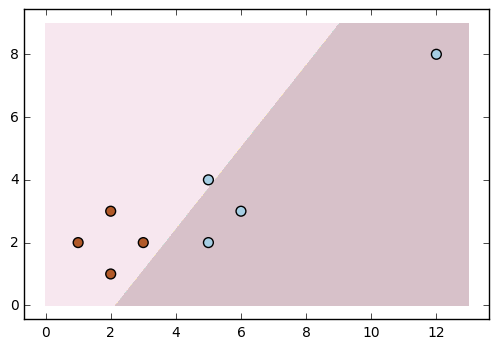

In [8]:
# RidgeClassifier

modelRidgeClassifier(outlier_X, outlier_y)


Accuracy: 7 out of 8
Accuracy %: 0.875



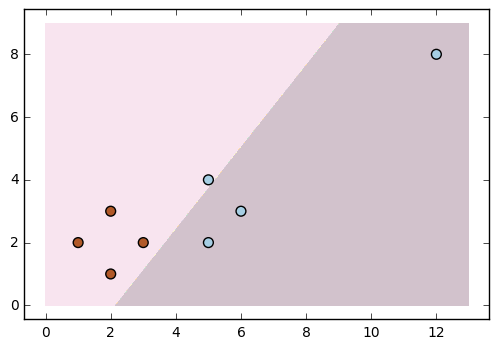

In [9]:
# LinearRegression

modelLinearRegression(outlier_X, outlier_y)


**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Accuracy: 7 out of 8
Accuracy %: 0.875



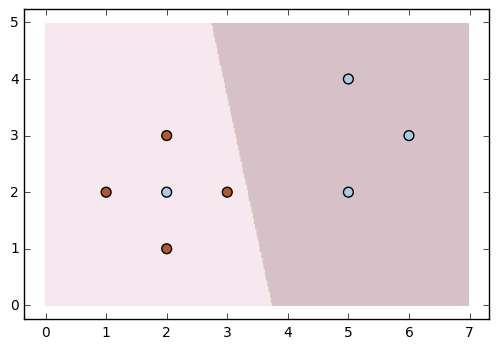

In [11]:
# RidgeClassifier

modelRidgeClassifier(unsep_X, unsep_y)


Accuracy: 7 out of 8
Accuracy %: 0.875



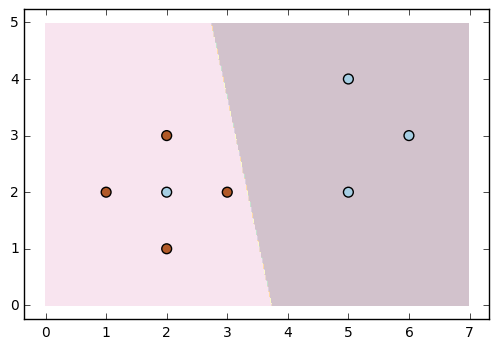

In [12]:
# LinearRegression

modelLinearRegression(unsep_X, unsep_y)


**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [9]:
from sklearn.datasets import make_classification

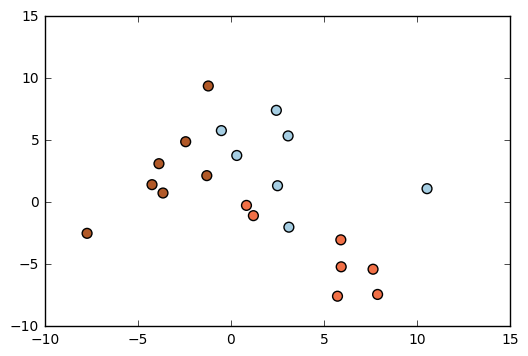

In [10]:
# Vaš kôd ovdje...

X, y = make_classification(n_samples=21, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=3,n_clusters_per_class=1, scale=3)

plot_2d_clf_problem(X, y, h=None)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

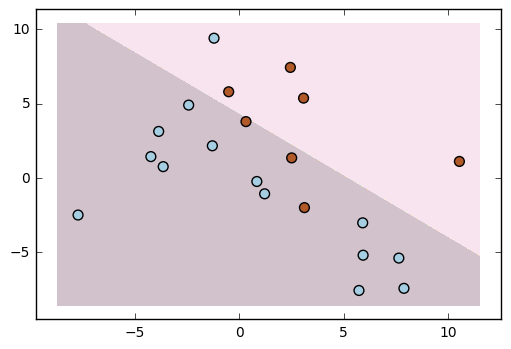

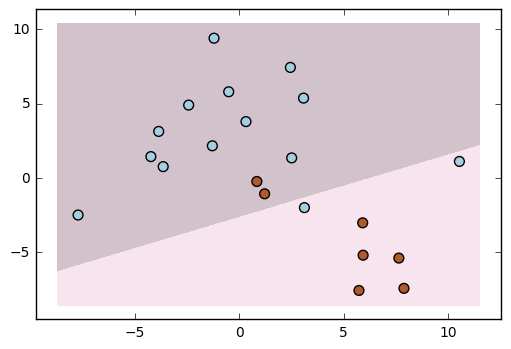

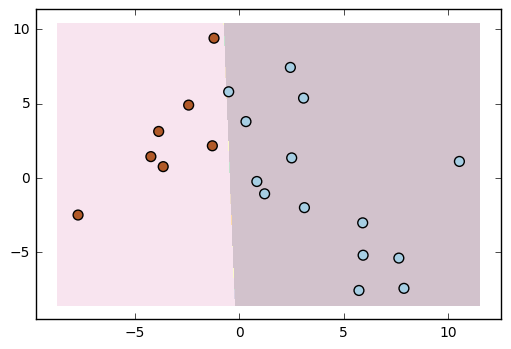

In [11]:
h_list = []
for i in [0,1,2]:
    y_ = y == i
    model = RidgeClassifier(alpha=0)
    model.fit(X, y_)
    h_list.append(model)
    plt.figure()
    plot_2d_clf_problem(X, y_, model.predict)

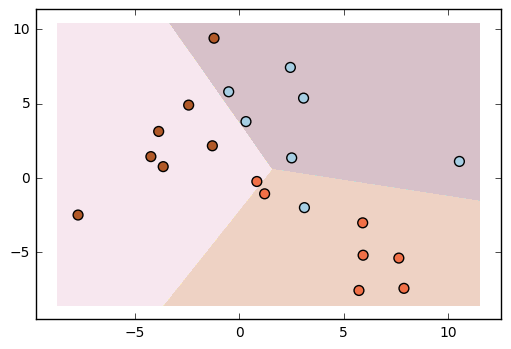

In [17]:
H = lambda x : np.argmax([h_list[0].decision_function(x), h_list[1].decision_function(x), 
                          h_list[2].decision_function(x)], axis = 0)
plot_2d_clf_problem(X, y, H)

Accuracy: 18 out of 21
Accuracy %: 0.857142857143



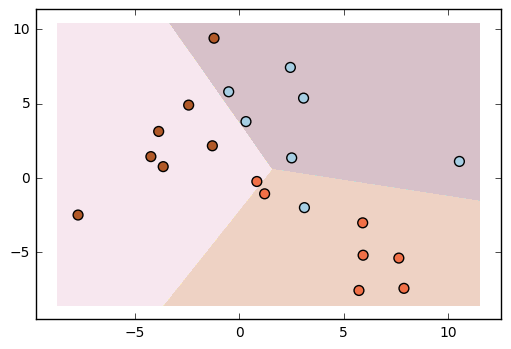

In [18]:
modelRidgeClassifier(X, y)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [19]:
def sigm(x, a=1):
    return 1/(1 + np.exp(-a * x))

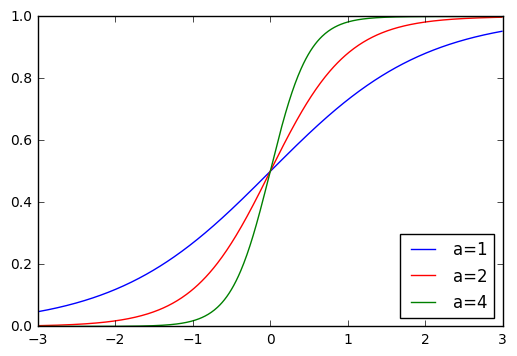

In [18]:
x = np.arange(-3, 3, 0.01)
for a, color in [(1, 'b'), (2, 'r'), (4, 'g')]:
    y = sigm(x, a)
    plt.plot(x, y, c = color, label='a={}'.format(a))

plt.legend(loc='lower right')
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [20]:
def lr_h(x, w):
    feat = sklearn.preprocessing.PolynomialFeatures(1)
    X = feat.fit_transform(x)
    return sigm(np.dot(X, w))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    N, D = X.shape
    W = np.zeros(D + 1)
    trace_array = []
    
    curr_err = 100000
    last_err = 0
    j = 0
    
    while (j < max_iter) and (abs(last_err - curr_err) > epsilon):
        
        delta_W = np.zeros(D + 1)
        h = lr_h(X, W)
        
        for i in range(N):
        
            delta_W[0] += (h[i] - y[i]) # *X1 koji je 1
            delta_W[1:] += (h[i] - y[i])*X[i]
            
        W[0] -= eta*delta_W[0]
        W[1:] = W[1:]*(1 - eta*alpha) - eta*delta_W[1:]
            
        last_err = curr_err
        curr_err = sklearn.metrics.log_loss(y, h)
        
        j += 1
        if trace == True:
            trace_array.append(np.copy(W))
        
    if trace:
        return (W, trace_array)
    else:
        return W
    

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [21]:
def cross_entropy_error(X, y, w):
    return sklearn.metrics.log_loss(y, lr_h(X, w))

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

In [22]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

9.99200722163e-16
[ 4.45699648 -1.71110937  0.68354609]


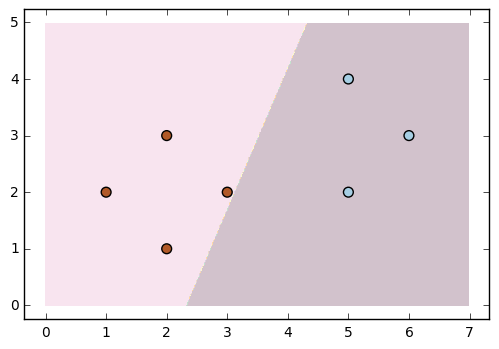

In [22]:
W = lr_train(seven_X, seven_y)
print cross_entropy_error(seven_X, seven_y, W)
print W
def decision(X):
    feat = sklearn.preprocessing.PolynomialFeatures(1)
    x = feat.fit_transform(X)
    return x.dot(W) > 0.5
plot_2d_clf_problem(seven_X, seven_y, decision)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [14]:
from sklearn.metrics import zero_one_loss

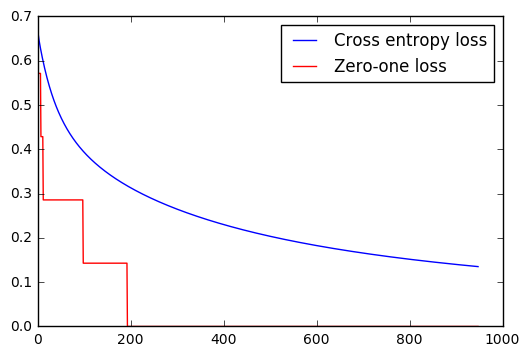

In [19]:
W, trace_arr = lr_train(seven_X, seven_y, trace = True)

cross_entropy_loss = []
zero_one_loss_list = []

for i in range(len(trace_arr)):
    cross_entropy_loss.append(cross_entropy_error(seven_X, seven_y, trace_arr[i]))
    zero_one_loss_list.append(zero_one_loss(seven_y, lr_h(seven_X, trace_arr[i]) > 0.5))

plt.plot(range(len(trace_arr)), cross_entropy_loss, label='Cross entropy loss', c = 'b')
plt.plot(range(len(trace_arr)), zero_one_loss_list, label='Zero-one loss', c = 'r')
plt.legend(loc='upper right')
plt.show()

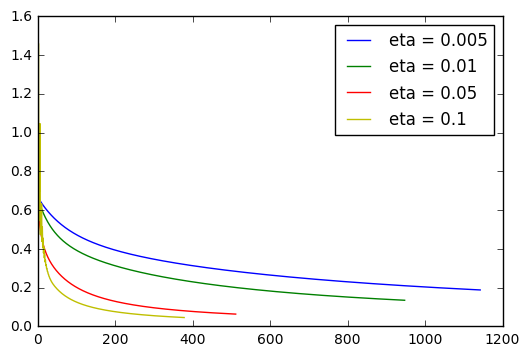

In [20]:
for i, color in [(0.005, 'b'), (0.01, 'g'), (0.05, 'r'), (0.1, 'y')]:
    cross_entropy_loss = []
    W, trace_arr = lr_train(seven_X, seven_y, eta = i, trace=True)
    for w in trace_arr:
        cross_entropy_loss.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(range(len(trace_arr)), cross_entropy_loss, c = color, label='eta = {}'.format(i))
    
plt.legend(loc='upper right')
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

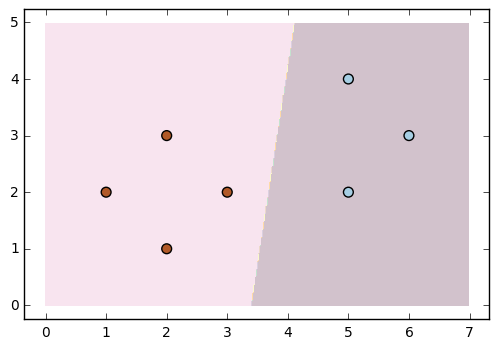

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=100)
model.fit(seven_X, seven_y)
h = model.predict(seven_X)
plot_2d_clf_problem(seven_X, seven_y, model.predict)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

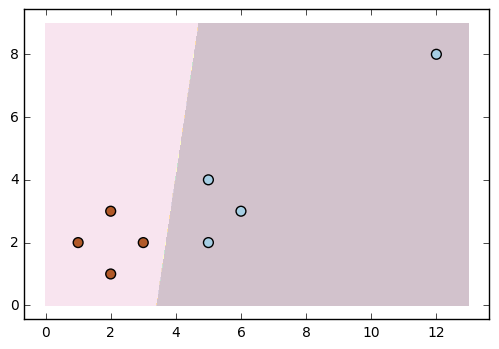

In [24]:
from sklearn.linear_model import LogisticRegression

outlier_y = (outlier_y == 1).astype(int)

model = LogisticRegression(C=100)
model.fit(outlier_X, outlier_y)
h = model.predict(outlier_X)
plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


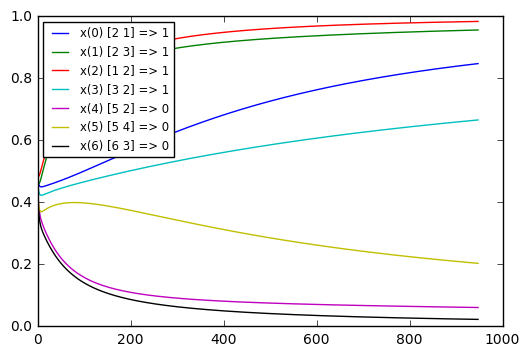

In [25]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

W, trace_arr = lr_train(seven_X, seven_y, trace=True)

N = seven_X.shape[0]
h_x = []

for i in range(N):
    h_x.append([])

for w in trace_arr:
    h = lr_h(seven_X, w)
    for i in range(N):
        h_x[i].append(h[i])

for i in range(N):
    plt.plot(range(len(trace_arr)), h_x[i], label='x(' + str(i) + ') ' + str(seven_X[i]) + ' => ' + str(seven_y[i]))
    
plt.legend(fontsize='small', loc='upper left')

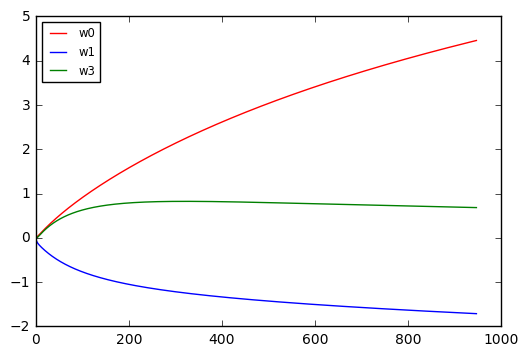

In [26]:
w2, w1, w0 = [], [], []
for W in trace_arr:
    w0.append(W[0])
    w1.append(W[1])
    w2.append(W[2])
for i, name, color in [(w0, 'w0', 'r'), (w1, 'w1', 'b'), (w2, 'w3', 'g')]:
    plt.plot(range(len(trace_arr)), i, label=name, c=color)
plt.legend(fontsize='small', loc='upper left')


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

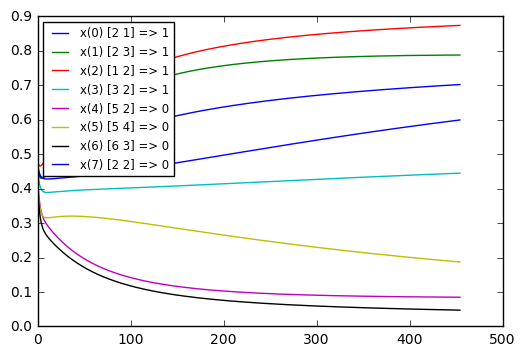

In [29]:
unsep_y = (unsep_y == 1).astype(int)

W, trace_arr = lr_train(unsep_X, unsep_y, trace=True)

N = unsep_X.shape[0]
h_x = []

for i in range(N):
    h_x.append([])

for w in trace_arr:
    h = lr_h(unsep_X, w)
    for i in range(N):
        h_x[i].append(h[i])

for i in range(N):
    plt.plot(range(len(trace_arr)), h_x[i], label='x(' + str(i) + ') '
             + str(unsep_X[i]) + ' => ' + str(unsep_y[i]))
    
plt.legend(fontsize='small', loc='upper left')

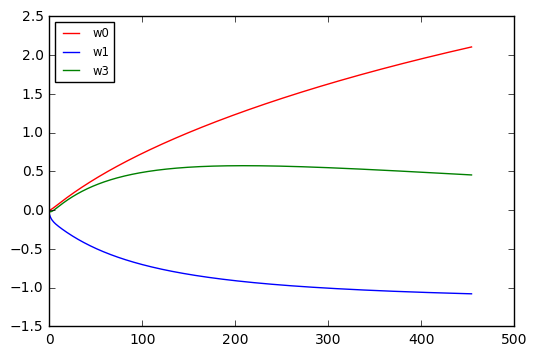

In [28]:
w2, w1, w0 = [], [], []
for W in trace_arr:
    w0.append(W[0])
    w1.append(W[1])
    w2.append(W[2])
for i, name, color in [(w0, 'w0', 'r'), (w1, 'w1', 'b'), (w2, 'w3', 'g')]:
    plt.plot(range(len(trace_arr)), i, label=name, c=color)
plt.legend(fontsize='small', loc='upper left')


**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

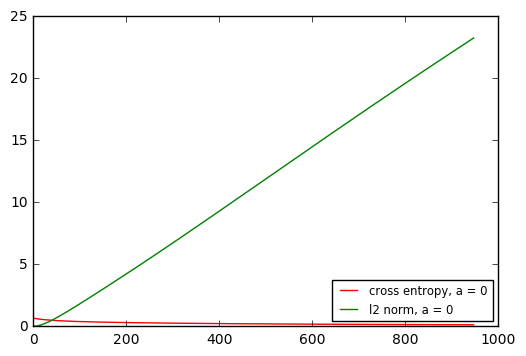

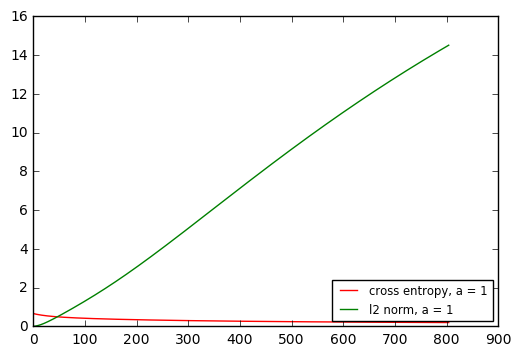

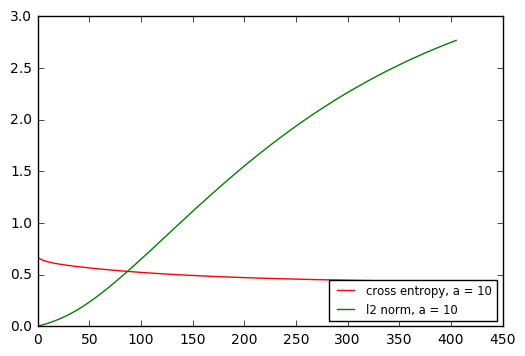

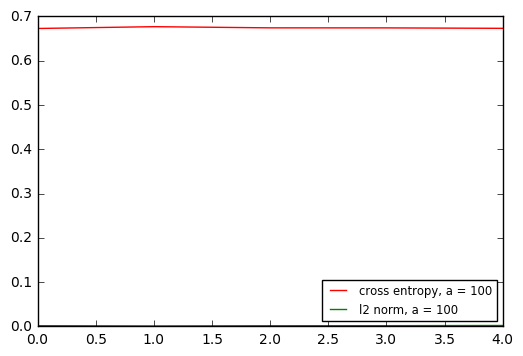

In [30]:
for a in [0, 1, 10, 100]:
    
    W, trace_arr = lr_train(seven_X, seven_y, alpha=a, trace=True)
    
    cross_entropy = []
    l2 = []
    
    for w in trace_arr:
        cross_entropy.append(cross_entropy_error(seven_X, seven_y, w))
        l2.append(np.dot(w, w))
    
    plt.figure()
    plt.plot(range(len(trace_arr)), cross_entropy, c='r', label='cross entropy, a = ' + str(a))
    plt.plot(range(len(trace_arr)), l2, c='g', label='l2 norm, a = ' + str(a))
    plt.legend(loc='lower right', fontsize='small')

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

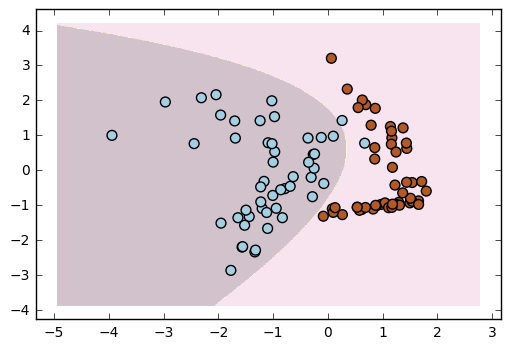

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

# d = 2
poly = PolynomialFeatures(2)
X_d2 = poly.fit_transform(X)
model = LogisticRegression()
model.fit(X_d2, y)
plt.figure()
plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

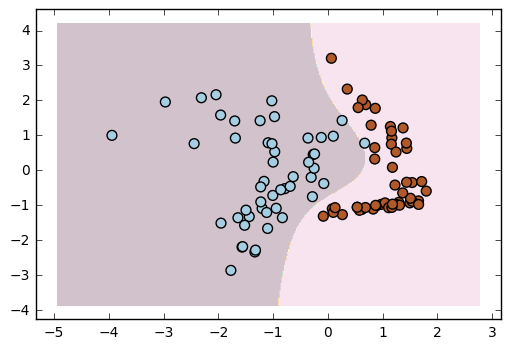

In [40]:
# d = 3
poly = PolynomialFeatures(3)
X_d3 = poly.fit_transform(X)
model = LogisticRegression()
model.fit(X_d3, y)
plt.figure()
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.fit_transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

(70, 2) (30, 2) (70,) (30,)


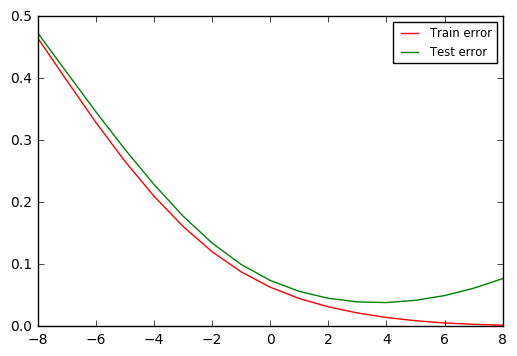

In [45]:
from sklearn import cross_validation
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

print X_train.shape, X_test.shape, y_train.shape, y_test.shape

poly = PolynomialFeatures(4)
X_d4 = poly.fit_transform(X)

C_range = range(-8, 9)
C = []
for i in C_range:
    C.append(np.power(2.0, i))

train_error = []
test_error = []

for c in C:
    model = LogisticRegression(C = c)
    model.fit(poly.fit_transform(X_train), y_train)
   
    h_train = model.predict_proba(poly.fit_transform(X_train))
    h_test = model.predict_proba(poly.fit_transform(X_test))
    
    train_error.append(log_loss(y_train, h_train))
    test_error.append(log_loss(y_test, h_test))

plt.plot(C_range, train_error, label='Train error', c='r')
plt.plot(C_range, test_error, label='Test error', c='g')
plt.legend(fontsize='small', loc='upper right')

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?